In [4]:
#!/hetghome/hetgsoft/anaconda3/bin/python3.9
#sed -i 's/\r//g' RK45_wo_tur_kmin.py
#chmod 777 RK45_wo_tur_kmin.py
from cProfile import label
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import math as m
import math
from scipy.optimize import fsolve
from scipy import linalg
import csv
import pandas as pd
import sys
import numpy as np
import os
from scipy.integrate import RK45
import time
import cmath 
acu = 1e-13
ts = 0.01
####################
#theta = m.pi/2
ar = 0.7
omg = 0.01
omga = -omg
v=1
mu=1
t1=600
t0=0
##############################################################
"""vxp=m.sin(theta)*v
vxn=m.sin(theta)*(-v)
vz=m.cos(theta)*v"""
#################################################
def absq(x):
    return (1-1/2*abs(x)**2)
def exa(a,b):
    return absq(a)*b-absq(b)*a
def tbif(t,y):
    dqdt=np.array([0+0j,0+0j,0+0j,0+0j])
    #dqdt=y
    #print('0-0-0-0-0-0-0-0-0-0',dqdt[0],dqdt[1],dqdt[2],dqdt[3])
    #print(type(dqdt[0]))
    #dqdt[0]=-omg*y[0]+0*0.5*mu*(absq(y[1])*y[0]-y[1]*absq(y[0]))-0*0.5*ar*mu*(absq(y[3])*y[0]-y[3]*absq(y[0]))
    dqdt[0]=-omg*y[0]+2/2*mu*(exa(y[1],y[0])-ar*exa(y[3],y[0]))+0/2*mu*(exa(y[0],y[0])-ar*exa(y[2],y[0]))
    dqdt[1]=-omg*y[1]+2/2*mu*(exa(y[0],y[1])-ar*exa(y[2],y[1]))+0/2*mu*(exa(y[1],y[1])-ar*exa(y[3],y[1]))
    dqdt[2]=-omga*y[2]+2/2*mu*(exa(y[1],y[2])-ar*exa(y[3],y[2]))+0/2*mu*(exa(y[0],y[2])-ar*exa(y[2],y[2]))
    dqdt[3]=-omga*y[3]+2/2*mu*(exa(y[0],y[3])-ar*exa(y[2],y[3]))+0/2*mu*(exa(y[1],y[3])-ar*exa(y[3],y[3]))
    #dqdt[0]+=-omg*y[0]
    #dqdt[1]+=-omg*y[1]
    #dqdt[2]+=-omga*y[2]
    #dqdt[3]+=-omga*y[3]
    #print('---------',dqdt[0],dqdt[1],dqdt[2],dqdt[3])
    dqdt=(-1j)*dqdt
    #print('>>>>>>>>>',dqdt[0],dqdt[1],dqdt[2],dqdt[3])
    return dqdt

fn='./f_RK45_N1_od2e_saj_omg_'+str(omg)+'_ar_'+str(ar)+'/'
# f_RK45_N1_od2_omg_-0.01_ar_0.7
if os.path.isdir(fn) == False:    
    os.mkdir(fn)
#Q0 = np.array([1.0+0j,1.0+0j,1.0+0j,1.0+0j])/2
q00=10**-9+0j
q01=10**-8+0j
q01=10**-9+0j
Q0 = np.array([q00,q01,q00,q01])
if Q0[0]==Q0[1]:
    fot = 'fat_'
else:
    fot='asy_'
#print(tbif(0,Q0))
#sys.exit()
"""def tbif(t,y):
    #dqdt=np.array([0+0j,0+0j,0+0j,0+0j])
    dqdt=y
    dqdt[0]=y[0]
    dqdt[1]=y[1]
    return dqdt
Q0 = np.array([10**-2+0j,10**-2+0j])"""
Sol = RK45(tbif,t0,Q0,t1,max_step=ts, rtol=acu, atol=acu * 10**-3, vectorized=False, first_step=None)
T =  []
Qt = []
Qn = []
T.append(t0)
Qt.append(Q0)
Qn.append(np.linalg.norm(Q0))
count_z  = 0
#fot = 'asy98_'
for k in range(10**12):
    Sol.step()
    #print(Sol.t,Sol.y)
    if count_z%1000 ==0:
        T.append(Sol.t)
        Qn.append((np.linalg.norm(Sol.y)))
        Qt.append(((Sol.y)))
        print(Sol.t,'append')
        #print(Sol.y,'soly')
        np.save(fn+fot+'RK45_T',T)
        np.save(fn+fot+'RK45_Qt',Qt)
        np.save(fn+fot+'RK45_Qn',Qn)
    count_z +=1
    if Sol.status == 'finished':
        break

"""np.save(fn+fot+'RK45_T',T)
np.save(fn+fot+'RK45_Qt',Qt)
np.save(fn+fot+'RK45_Qn',Qn)
"""

0.01 append


10.009999999999831 append
20.01000000000033 append
30.01000000000189 append
40.01000000000061 append
50.00999999999862 append
60.00999999999663 append
70.00999999999891 append
80.01000000000403 append
90.01000000000914 append
100.01000000001426 append
110.01000000001937 append
120.01000000002449 append
130.01000000002674 append
140.01000000001764 append
150.01000000000855 append
160.00999999999945 append
170.00999999999036 append
180.00999999998126 append
190.00999999997217 append
200.00999999996307 append
210.00999999995398 append
220.00999999994488 append
230.0099999999358 append
240.0099999999267 append
250.0099999999176 append
260.00999999990853 append
270.00999999989943 append
280.00999999989034 append
290.00999999988125 append
300.00999999987215 append
310.00999999986306 append
320.00999999985396 append
330.00999999984487 append
340.00999999983577 append
350.0099999998267 append
360.0099999998176 append
370.0099999998085 append
380.0099999997994 append
390.0099999997903 append
40

"np.save(fn+fot+'RK45_T',T)\nnp.save(fn+fot+'RK45_Qt',Qt)\nnp.save(fn+fot+'RK45_Qn',Qn)\n"

f_RK45_N1_od2e_saj_omg_0.01_ar_0.7
f_RK45_N1_od2e_saj_omg_0.01_ar_0.7
asy_RK45_T.npy
2024-04-08 20:18:22.419103


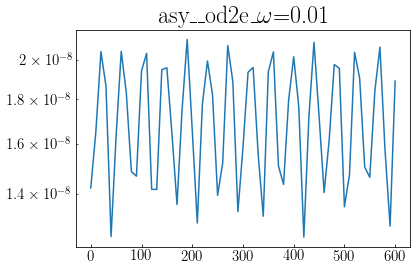

f_RK45_N1_od2e_saj_omg_0.01_ar_0.7
fat_RK45_T.npy
2024-04-08 20:19:42.486102


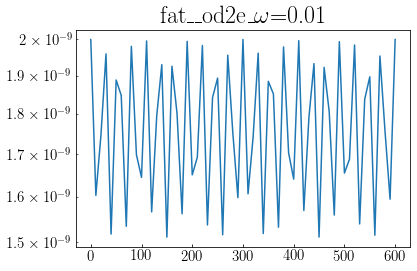

In [5]:
#!/hetghome/hetgsoft/anaconda3/bin/python3.9
import matplotlib
%matplotlib inline
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math as m
import math
from scipy.fft import fft, fftfreq, fftshift
"""from scipy.optimize import fsolve
from scipy import linalg"""
import csv
import pandas as pd
import sys
import numpy as np
import os
from scipy.integrate import RK45
import time
import seaborn as sns
from os.path import exists
from matplotlib import rc
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
rc('font',**{'family':'serif','serif':['Roman'],'size':20})
plt.rc('legend', fontsize=10) 
plt.rc('xtick', labelsize=15)    
plt.rc('ytick', labelsize=15)
rc('text', usetex=True)
import datetime
#################################################################
from configparser import ConfigParser

#########################################
path = os.getcwd()
#print(path)
for h in os.listdir(path):
    #print(h)
    if 'saj' not in h:
        #print('N1 conti')
        continue
    if 'N1' not in h:
        #print('N1 conti')
        continue
    if 'RK45' not in h:
        #print('RK45 conti')
        continue
    if 'od2e_'  not in h:
        #print('non conti')
        continue
    print(h)
    if 'f_' not in h:
        #print('f_ conti')
        continue
    ome=h[h.find('omg_')+4:h.find('_ar_')]
    """fot = 'fat8_'
    fot = 'asy98_'"""
    fot = 'asy_'
    fot2 = 'fat_'
    #for i in os.listdir(path+'/'+h):
    if os.path.exists(path+'/'+h+'/'+fot+'RK45_T.npy') == False:
        print('no file')
        continue
    print(h)
    print(fot+'RK45_T.npy')
    print(datetime.datetime.fromtimestamp(os.path.getmtime(path+'/'+h+'/'+fot+'RK45_T.npy')))
    T = np.load(path+'/'+h+'/'+fot+'RK45_T.npy')
    Qn = np.load(path+'/'+h+'/'+fot+'RK45_Qn.npy')
    plt.plot(T,Qn)
    plt.title(fot+'_od2e_'+r'$\omega$='+ome)
    #plt.xlim(-1,5)
    plt.yscale('log')
    plt.savefig(path+'/'+h+'/'+fot+'RK45.jpg')
    plt.show()
    plt.close('all')
    ################################
    print(h)
    print(fot2+'RK45_T.npy')
    print(datetime.datetime.fromtimestamp(os.path.getmtime(path+'/'+h+'/'+fot2+'RK45_T.npy')))
    T = np.load(path+'/'+h+'/'+fot2+'RK45_T.npy')
    Qn = np.load(path+'/'+h+'/'+fot2+'RK45_Qn.npy')
    plt.plot(T,Qn)
    plt.title(fot2+'_od2e_'+r'$\omega$='+ome)
    #plt.xlim(-1,5)
    plt.yscale('log')
    plt.savefig(path+'/'+h+'/'+fot2+'RK45.jpg')
    plt.show()
    plt.close('all')